In [1]:
import numpy as np
import pandas as pd

# CART的简介
CART的特点
- CART是一种**二叉决策树**，而ID3和C4.5即支持二叉树、也支持多叉树
- **根据预测的值是离散还是连续**，可以CART将生成分类树或是回归树
- 输出方面：分类树会以叶结点中的多数类别作为输出的类，回归树会以叶结点中所有样本的均值作为最终输出

# 划分属性的选择

## CART分类树中的划分属性选择
**CART分类树采用$Gain\_GINI$作为选择划分属性的依据**。

首先，对于某一个结点的样本集$S$，使用$Gini$定义该结点的纯度：
$$Gini(S) = 1-\sum P_{k}^{2}$$，其中，$P_{k}^{2}$表示样本集中类别$k$出现的概率

使用属性$A$的属性值$i$将包含$N$个样本的样本集$S$划分成$S_1$和$S_2$两部分（这就是CART是二叉树的原因），划分后定义$Gain\_GINI$
$$Gain\_GINI_{A,i}(S)=\frac{n_1}{N}Gini(S_1)+\frac{n_2}{N}Gini(S_2)$$

对于属性$A$，期望找到的属性值$i$，以获得属性A的最优二分，即期望
$$min_{i \in A}\{Gain\_GINI_{A,i}(S)\}$$

对于样本集S，期望找到属性A，以获得样本集S的最优二分，即期望
$$min_{A \in Attribute}\{min_{i \in A}\{Gain\_GINI_{A,i}(S)\}\}$$

## CART回归树中的划分属性选择
区别于分类树，**CART回归树使用$Gain \_ \sigma$作为选择划分属性的指标**。

对于连续值输出的样本集$S$，其纯度由所有样本输出的均方差（即$L_2$范数）定义
$$MSE(S)=\sigma(S)=\sqrt{\sum(y_k-\mu)^2}$$，其中，$y_k$是各样本的输出值，$\mu$是样本输出的均值。

使用属性 𝐴 的属性值 𝑖 将包含 𝑁 个样本的样本集 𝑆 划分成 𝑆1 和 𝑆2 两部分，划分后定义$Gain \_ \sigma$为
$$Gain \_ \sigma_{A,i}(S)=\sigma(S_1)+\sigma(S_2)$$

对于属性 𝐴 ，期望找到的属性值 𝑖 ，以获得属性A的最优二分，即期望
$$min_{i \in A}\{Gain \_ \sigma_{A,i}(S)\}$$

对于样本集S，期望找到属性A，以获得样本集S的最优二分，即期望
$$min_{A \in Attribute}\{min_{i \in A}\{Gain \_ \sigma_{A,i}(S)\}\}$$

# 确定叶结点的输出值

## 确定CART分类树叶结点的输出值


## 确定CART回归树叶结点的输出值
对于输入空间划分出的$M$个区域$R_1,R_2,...,R_M$，某区域$R_m$的输出由每个区域上样本标签值的均值确定



# CART回归树生成的流程
![](https://gitee.com/llillz/images/raw/master/CART%E5%9B%9E%E5%BD%92%E6%A0%91%E7%9A%84%E7%94%9F%E6%88%90.jpg)

# 剪枝
剪枝分为预剪枝和后剪枝，CART采用的是后剪枝。

后剪枝方法又分为两种，一类是把训练数据集分成树的生长集和剪枝集；另一类算法则是使用同一数据集进行决策树生长和剪枝。

**常见的后剪枝方法**有CCP(Cost Complexity Pruning)、REP(Reduced Error Pruning)、PEP(Pessimistic Error Pruning)、MEP(Minimum Error Pruning)。**CART中使用最多的是CCP**。

## 代价复杂性剪枝法CCP
CCP包含两个步骤
1. 从原始决策树$T_0$开始生成一个子树序列$\{T_0,T_1,...,T_n\}$，其中，$T_{i+1}$从$T_i$产生，$T_n$为根节点。
2. 从第1步产生的子树序列中，根据树的真实误差估计选择最佳决策树


**第一个步骤：**步骤一的核心问题在于如何根据$T_i$产生$T_{i+1}$。生成子树序列$\{T_0,T_1,...,T_n\}$的基本思想是从$T_0$开始，裁剪$T_i$中关于训练数据集误差增加最小的分枝来得到$T_{i+1}$。

这里剪枝产生的误差增加从直观上是$R(t)−R(T_t)$，其中$R(t)$是**结点t的子树被裁剪后**以结点t为子树的训练集误差（之后会详细说明），$R(T_t)$是结点t的子树被裁剪前结点t的训练集误差。

根据奥卡姆剃刀原则，我们希望剪枝在产生相同误差增加情况下得到复杂度更小的子树。为了考虑复杂度，我们引入**误差增加率$\alpha$**这个概念，它被定义为
$$\alpha=\frac{R(t)−R(T_t)}{|L(T_t)|-1}$$
- $L(T_t)$是以结点t为根节点的子树的叶节点数。$L(T_t)-1$表示的是由于剪枝而减少的叶节点数量（用于描述复杂度降低）。从上式中可以看出，**我们希望剪枝后获得误差/代价增加（分子）较小而复杂度降低（分母）较大，即$\alpha$较小的子树**。
- $R(t)$表示节点t的子树被裁剪后节点t的误差，$R(t)=r(t)∗p(t)$，$R(t)$是结点的分类误差率（以该结点为叶节点时将多数类作为输出，结点的分类误差率=样本正确分类数/结点上的样本总数），$p(t)$是结点t上的样本总数与训练集样本总数之比。
- $𝑅(𝑇_𝑡)$是结点t的子树被裁剪前结点t的训练集误差，即结点t所有叶节点的训练集误差之和。



因此，$T_{i+1}$就是选择对$T_i$自底向上剪枝的过程中$\alpha$最小的子树。


实例可见**[这里](https://blog.csdn.net/zhihua_oba/article/details/72230427?utm_medium=distribute.pc_relevant.none-task-blog-BlogCommendFromMachineLearnPai2-2.channel_param&depth_1-utm_source=distribute.pc_relevant.none-task-blog-BlogCommendFromMachineLearnPai2-2.channel_param)**。

**第二个步骤：**步骤二的关键问题在于如何在子树序列$\{T_0,T_1,...,T_n\}$中选出1棵最佳决策树。通常采用的方法有两种：
1. V番交叉验证(V-fold cross-validation)
2. 基于独立剪枝数据集。

# 实战
## CART分类树实战
sklearn提供了DecisionTreeClassifier类，它criterion参数默认为'gini'，表示使用CART算法。下面是调用方法：

In [2]:
from sklearn.tree import DecisionTreeClassifier  # 调用CART

**实例**：调用iris数据集，使用CART进行训练，然后根据预测结果并计算accuracy值。

### 调用iris数据集
数据特点
- 属性连续（输入连续值）
- 类别有限（输出离散值）

In [3]:
from sklearn.datasets import load_iris

In [4]:
iris = load_iris()  # 获取数据集
features, labels = iris.data, iris.target  # 获取特征和标签

### 数据划分

In [5]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.33, random_state=0)  # 2/3作为训练集 1/3作为测试集

### 建立模型

In [6]:
clf = DecisionTreeClassifier()  #  参数criterion默认为;'gini'

### 训练模型

In [7]:
clf = clf.fit(train_features, train_labels)  # 拟合决策树

### 模型预测

In [8]:
test_predict = clf.predict(test_features)  # 预测

### 模型评估

In [9]:
from sklearn.metrics import accuracy_score
score = accuracy_score(test_labels, test_predict)  # 计算accuracy值
print("CART准确率 = " + str(score))

CART准确率 = 0.98


### 模型可视化（决策树可视化）

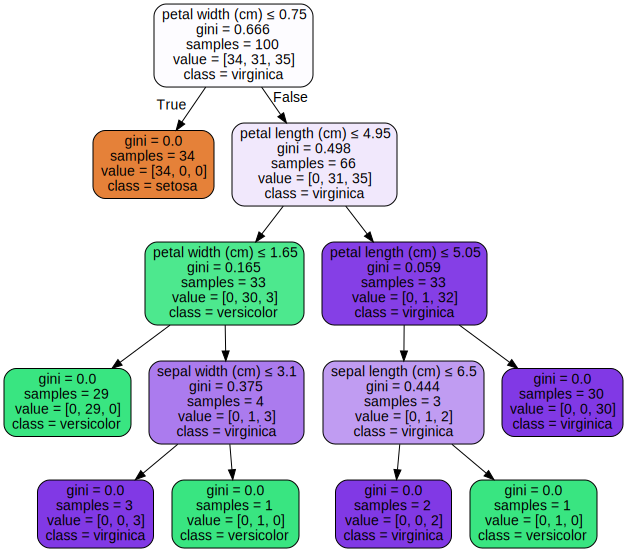

In [10]:
import graphviz 
from sklearn import tree
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 

dot_data = tree.export_graphviz(clf, 
                                out_file=None, 
                                feature_names=iris.feature_names,  
                                class_names=iris.target_names,  
                                filled=True, rounded=True,  
                                special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

每个矩形框包含以下信息：
- 决策依据（eg.petal width(cm)≤1.65）
- 基尼值（gini）
- 当前结点样本数（sample）
- 当前结点分类后各类别数量的列表（eg.value=\[34，31，35\]）
- 当前结点划分成哪个类（class）

## CART回归树实战
实例：使用CART预测波士顿房价

### 准备数据集

In [11]:
from sklearn.datasets import load_boston
boston = load_boston()

print(boston.DESCR)  # 查看数据集基本信息

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### 数据划分

In [12]:
from sklearn.model_selection import train_test_split

features, labels = boston.data, boston.target
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.33)

### 建立模型

In [13]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
dtr = DecisionTreeRegressor()

### 训练模型

In [14]:
dtr = dtr.fit(features_train, labels_train)

### 模型预测

In [15]:
labels_predict = dtr.predict(features_test)
labels_predict

array([22.9, 26.6, 50. , 15.6, 24.3, 35.4, 20.3, 10.2, 24.4, 46. ,  8.1,
       19.2,  8.4, 21. , 13. , 28.4, 24. , 24.2, 24.8,  5. , 31.1, 23.2,
       36.1, 10.2, 13.6, 24. , 18.3, 33.1, 20. , 45.4, 24.8, 18.3, 22. ,
       19.6, 22.9, 20.2, 24.6, 27.9, 23.1,  9.5, 15. , 19.6, 11.3, 21.4,
       20.7,  8.3, 36.4, 23.7, 44.8, 50. , 21.7, 12.6, 15. , 23.7, 17.2,
       17.8, 28.7, 22. , 46. , 13.5, 20. , 19.5, 36. , 21.7, 23.6, 21.7,
       24.5, 10.9, 23.8, 23.8, 19.6, 21.4, 22.9, 14.8, 34.9, 37. , 23.9,
       24.5, 21.7,  8.8, 37.3, 17.1, 17.1, 17.1, 33.1, 14.8, 24.4, 19.7,
       21.4, 10.8, 19.6,  7.2, 15. , 19.1, 36.4, 33.1, 10.9, 44.8, 13. ,
       19.4, 23.7, 36.2, 29.6, 21.4, 20.8, 13.8, 35.2, 24.8, 21.7,  9.5,
       24.1, 23.3, 23.8, 17.1, 21.6, 20.9, 31.6, 29.9, 50. , 20.7, 15.6,
       21.7, 21.7, 13.5, 19.9, 22.8, 20.7, 23.2, 19.9, 19.9, 19.6, 28.7,
       12.7, 23.8, 19.8, 19.6, 24.5, 28.1, 30.1, 29.9, 48.8, 37. , 12.6,
       25. , 14.8, 23.1, 19.9, 12.7, 24.1, 15. , 37

### 模型评估

In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print('CART的预测均方误差：', mean_squared_error(labels_test, labels_predict))
print('CART的预测绝对值误差均值：', mean_absolute_error(labels_test, labels_predict))

CART的预测均方误差： 28.444850299401203
CART的预测绝对值误差均值： 3.1431137724550897


### 模型可视化

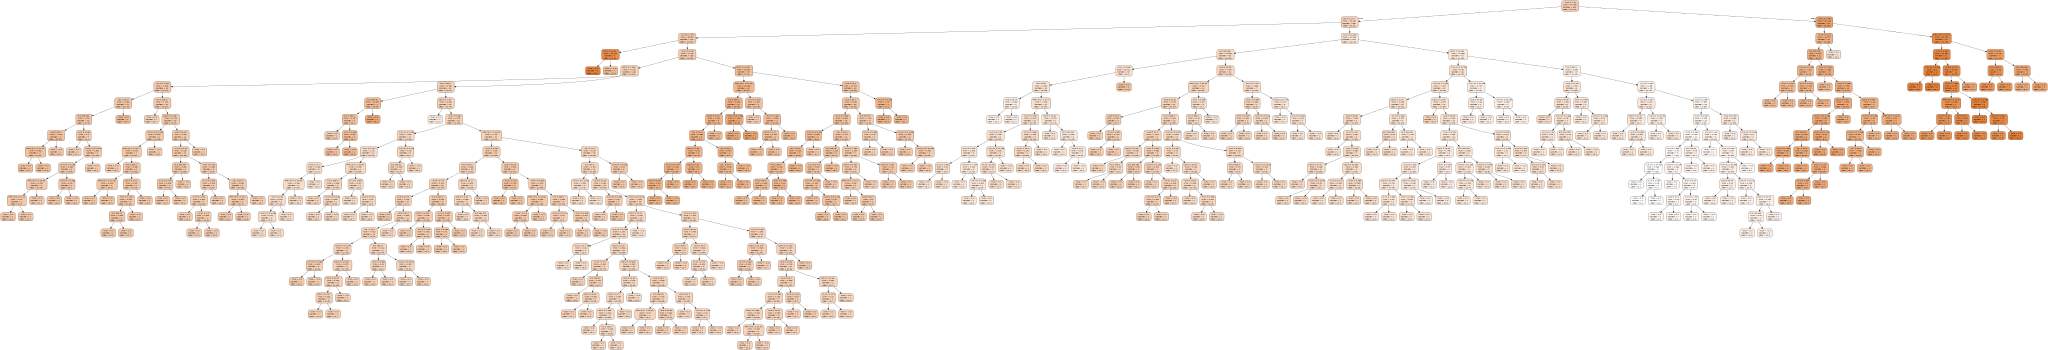

In [17]:
import graphviz 
from sklearn import tree
dot_data = tree.export_graphviz(dtr, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("boston") 

dot_data = tree.export_graphviz(dtr, 
                                out_file=None, 
                                feature_names=boston.feature_names,  
                                class_names="MEDV",   # 变量`boston`本身没有该属性，要自己设置
                                filled=True, rounded=True,  
                                special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

## 调参
sklearn中决策树有关的主要参数有以下几个，

![](sklearn分类回归树类的参数介绍.png)

sklearn新版本中，决策树模型还提供了`cost_complexity_pruning_path`方法来选取合适ccp_alpha参数，这个下面详细介绍。

### 修改CCP剪枝的停止条件，即$\alpha$的上限（ccp_alpha）

**核心问题1**：ccp_alpha参数是如何影响决策树模型的？

**sklearn中，当剪枝树的最小的$\alpha$值大于ccp_alpha时，剪枝过程会停止**，因此：
- ccp_alpha越大，删除的结点就会越多，适用于模型有点过拟合时。但是该值过大时，剪枝就会过度，此时模型在训练集和测试集上的精准率都会降低。
- ccp_alpha越小，删除的结点就会越小，适用于模型有点欠拟合时。但是该值过小（≥0）时，特别的，当$\alpha=0$，此时模型没有进行剪枝，其准确率在训练集上很高，而在测试集上很低，模型的泛化能力很差。

In [18]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier

为了获取合适的ccp_alpha，sklearn提供了` DecisionTreeClassifier.cost_complexity_pruning_path`以返回每次剪枝$\alpha$和相应的所有叶节点的整体不纯度（total leaf impurities）。

In [23]:
X, y = load_breast_cancer(return_X_y=True)  # 加载数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)  # 数据划分（默认测试集占1/4）

clf = DecisionTreeClassifier(random_state=0)  # 调用CART分类树模型
path = clf.cost_complexity_pruning_path(X_train, y_train)  
ccp_alphas, impurities = path.ccp_alphas, path.impurities

ccp_alpha越大，被减去的子树就会越多，所有叶节点的整体不纯度就会上升，可视化为下图：

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

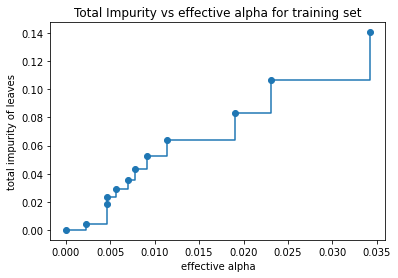

In [28]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

**核心问题2**：其他条件不变时，如何选择适合的ccp_alpha，使得模型在测试集上的精准率最高？

首先利用前面得到的ccp_alphas列表，应用到一组决策树模型的训练中：

In [33]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)  # 训练一组模型，作为list的元素

然后绘制出模型在设置不同ccp_alpha参数下的训练集/测试集分类精准率的变化图：

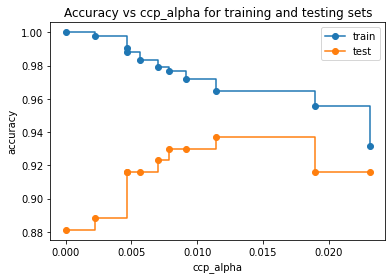

In [37]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("ccp_alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs ccp_alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
ax.legend()
plt.show()

从图像中可以很明显看到，ccp_alpha取值0.015时，模型在测试集上表现最好。